# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jiagedaqi
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | balkashino
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | inekar
City not found. Skipping...
Processing Record 7 of Set 1 | santa elena de uairen
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | naranjal
Processing Record 17 of Set 1 | chandler
Processing Record 18 of Set 1 | sarkand
Processing Record 19 of Set 1 | port moresby
Processing Record 20 of Set 1 | novodvinsk
Processing Record 21 o

Processing Record 37 of Set 4 | bandarbeyla
Processing Record 38 of Set 4 | qaqortoq
Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 41 of Set 4 | nar'yan-mar
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | ust-nera
Processing Record 44 of Set 4 | daru
Processing Record 45 of Set 4 | sale
Processing Record 46 of Set 4 | laguna larga
Processing Record 47 of Set 4 | alotau
City not found. Skipping...
Processing Record 48 of Set 4 | dzhalagash
Processing Record 49 of Set 4 | queenstown
Processing Record 0 of Set 5 | smithers
Processing Record 1 of Set 5 | ciudad sabinas hidalgo
Processing Record 2 of Set 5 | mocoreta
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | shira
Processing Record 5 of Set 5 | sosnovo-ozerskoye
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | myitkyina
Processing Record 8 of Set 5 | robertsport
Processing

Processing Record 29 of Set 8 | arar
Processing Record 30 of Set 8 | semnan
Processing Record 31 of Set 8 | saynshand
Processing Record 32 of Set 8 | camayenne
Processing Record 33 of Set 8 | oranjemund
Processing Record 34 of Set 8 | hoxtolgay
City not found. Skipping...
Processing Record 35 of Set 8 | hailey
Processing Record 36 of Set 8 | shimoda
Processing Record 37 of Set 8 | gao
Processing Record 38 of Set 8 | mogocha
Processing Record 39 of Set 8 | san luis de la loma
Processing Record 40 of Set 8 | aldan
Processing Record 41 of Set 8 | colonia
Processing Record 42 of Set 8 | santo antonio do ica
Processing Record 43 of Set 8 | norfolk
Processing Record 44 of Set 8 | fochville
Processing Record 45 of Set 8 | freetown
Processing Record 46 of Set 8 | sangre grande
Processing Record 47 of Set 8 | sittwe
Processing Record 48 of Set 8 | esqueda
Processing Record 49 of Set 8 | nuuk
Processing Record 0 of Set 9 | as sulayyil
Processing Record 1 of Set 9 | noshiro
Processing Record 2 of

Processing Record 22 of Set 12 | kenai
Processing Record 23 of Set 12 | an nuhud
Processing Record 24 of Set 12 | sillamae
Processing Record 25 of Set 12 | chongjin
Processing Record 26 of Set 12 | arkhangel'sk
Processing Record 27 of Set 12 | chibougamau
Processing Record 28 of Set 12 | pedernales
Processing Record 29 of Set 12 | stavrovo
Processing Record 30 of Set 12 | qarqaraly
Processing Record 31 of Set 12 | hirara
Processing Record 32 of Set 12 | juneau
Processing Record 33 of Set 12 | laikit, laikit ii (dimembe)
Processing Record 34 of Set 12 | salacgriva
Processing Record 35 of Set 12 | hengchun
Processing Record 36 of Set 12 | zhigalovo
Processing Record 37 of Set 12 | dokkum
Processing Record 38 of Set 12 | ijuw
City not found. Skipping...
Processing Record 39 of Set 12 | taltal
Processing Record 40 of Set 12 | sao vicente
Processing Record 41 of Set 12 | praia da vitoria
Processing Record 42 of Set 12 | reguengos de monsaraz
Processing Record 43 of Set 12 | ambodivoara
City

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jiagedaqi,50.4167,124.1167,21.20,43,73,1.25,CN,1693969213
1,puerto natales,-51.7236,-72.4875,-1.59,85,64,2.26,CL,1693968964
2,sitka,57.0531,-135.3300,13.35,82,62,1.23,US,1693969214
3,balkashino,52.5167,68.7667,8.93,75,99,4.56,KZ,1693969214
4,edinburgh of the seven seas,-37.0676,-12.3116,14.37,85,100,15.30,SH,1693969215


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jiagedaqi,50.4167,124.1167,21.20,43,73,1.25,CN,1693969213
1,puerto natales,-51.7236,-72.4875,-1.59,85,64,2.26,CL,1693968964
2,sitka,57.0531,-135.3300,13.35,82,62,1.23,US,1693969214
3,balkashino,52.5167,68.7667,8.93,75,99,4.56,KZ,1693969214
4,edinburgh of the seven seas,-37.0676,-12.3116,14.37,85,100,15.30,SH,1693969215


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

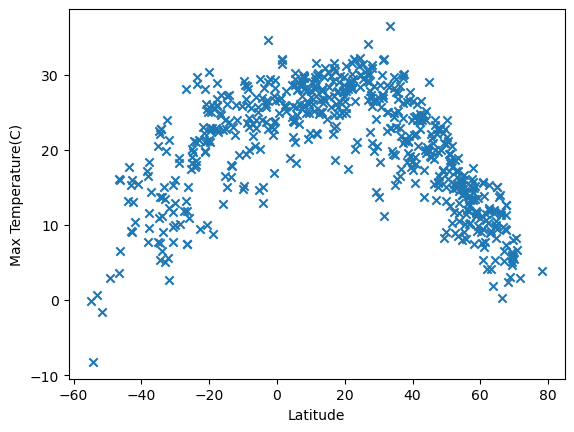

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='x')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

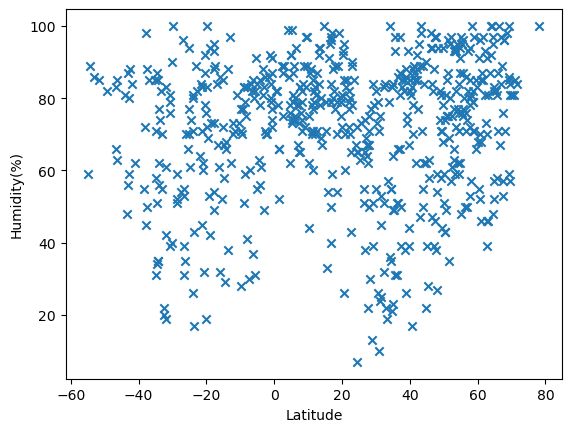

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='x')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

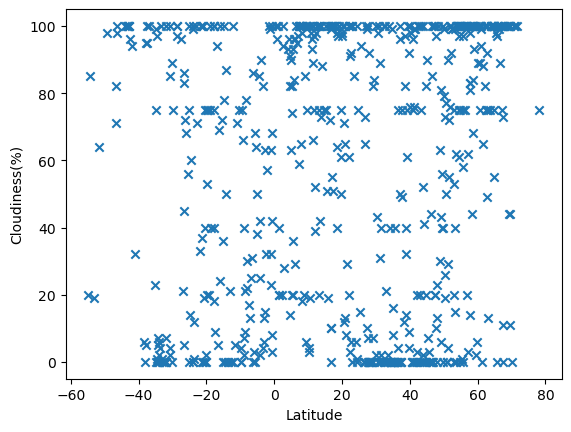

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='x')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

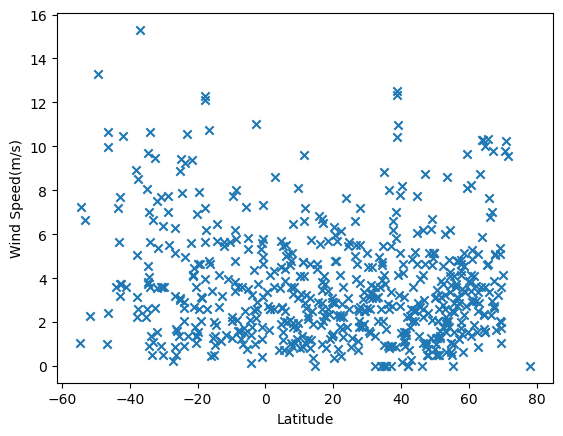

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='x')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    plt.scatter(x_axis, y_axis ,marker="x")
    plt.plot(x_axis,p_fit)
    plt.annotate(eq, eq_loc)
    print(f"The r-value is {round(correlation[0],2)}")

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jiagedaqi,50.4167,124.1167,21.20,43,73,1.25,CN,1693969213
2,sitka,57.0531,-135.3300,13.35,82,62,1.23,US,1693969214
3,balkashino,52.5167,68.7667,8.93,75,99,4.56,KZ,1693969214
5,santa elena de uairen,4.6167,-61.1333,21.64,62,91,1.91,VE,1693969216
11,saipan,15.1355,145.7010,30.39,79,75,4.63,MP,1693969219


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,-1.59,85,64,2.26,CL,1693968964
4,edinburgh of the seven seas,-37.0676,-12.3116,14.37,85,100,15.30,SH,1693969215
6,port mathurin,-19.6833,63.4167,22.84,72,53,7.94,MU,1693969216
7,waitangi,-43.9535,-176.5597,13.23,81,100,3.58,NZ,1693969217
8,port-aux-francais,-49.3500,70.2167,2.99,82,98,13.28,TF,1693969218


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.82


Text(0, 0.5, 'Temperature(C)')

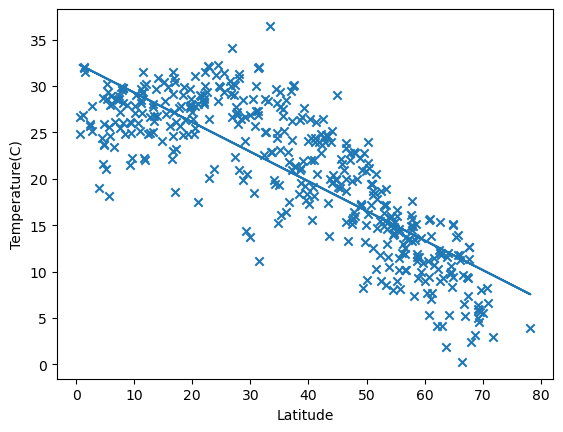

In [41]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value is 0.7


Text(0, 0.5, 'Temperature(C)')

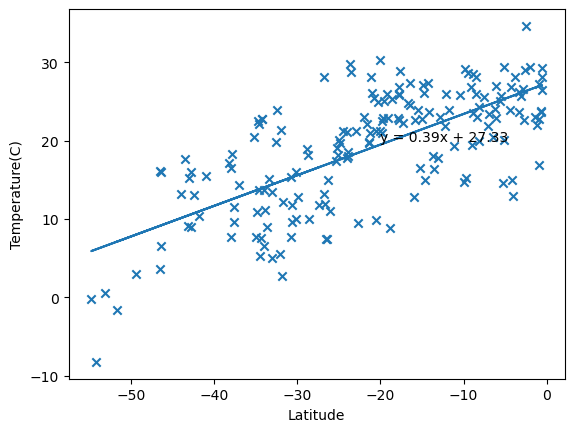

In [48]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-20, 20))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

**Discussion about the linear relationship:** We see a positive correlation in the southern hemisphere and a positive one in the north.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.02


Text(0, 0.5, 'Humidity(%)')

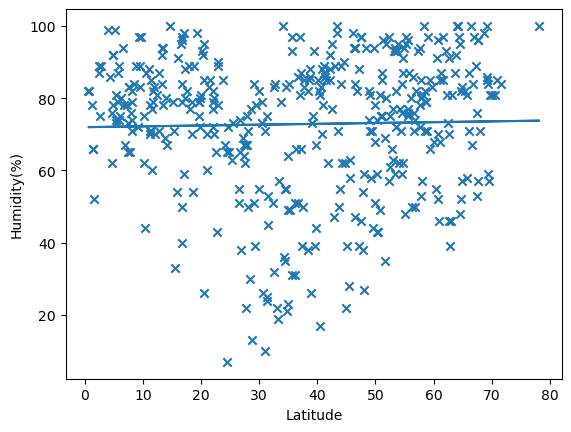

In [49]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(40, 0))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value is 0.09


Text(0, 0.5, 'Humidity(%)')

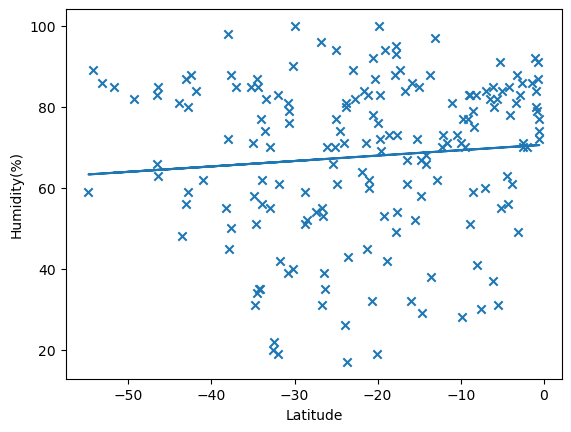

In [50]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-40, 0))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** No strong corelation seen in either hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.03


Text(0, 0.5, 'Cloudiness(%)')

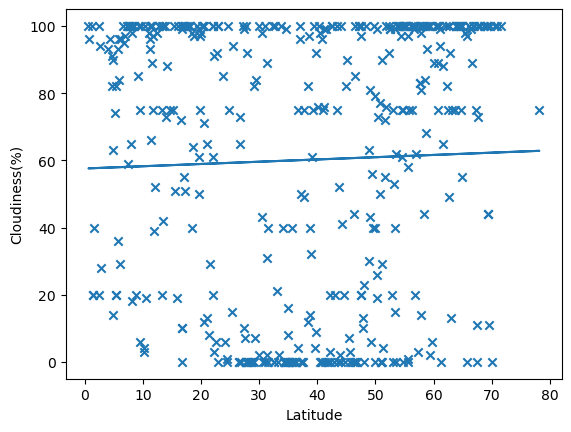

In [53]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(20, -20))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value is -0.18


Text(0, 0.5, 'Cloudiness(%)')

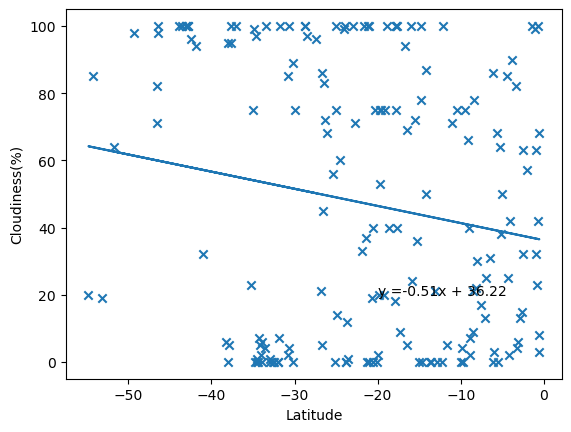

In [54]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-20, 20))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** Not conclusive evidence for a strong corelation in either hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.09


Text(0, 0.5, 'Wind Speed(m/s)')

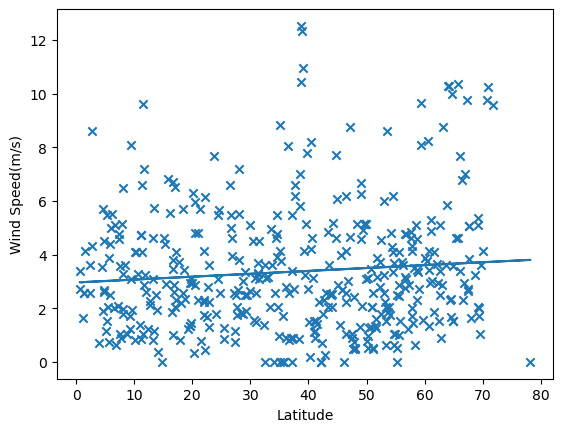

In [55]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(20, -20))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value is -0.23


Text(0, 0.5, 'Wind Speed(m/s)')

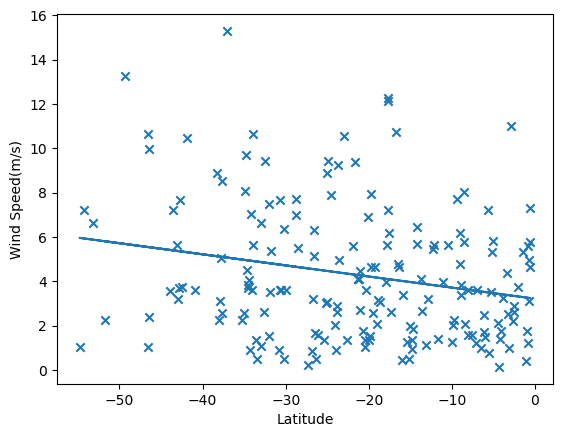

In [56]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-20, 20))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** There is a slight negative corelation in the southern hemisphere but barely any in the north